 # Lab 6
 
 ## William Willmon
 
 ### Newman Exercise 5.12 - Stefan-Boltzmann constant 

In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("style.css", "r").read()
    return HTML(styles)
css_styling()

In [7]:
from scipy import integrate
import numpy as np
import math

k_b = 1.38e-23     # m^2kg/s^2K
c = 3e8            # m/s
hbar = 1.0546e-34  # m^2kg/s
T = 300            # K

def f(x):
    return x**3*math.exp(-x)/(1-math.exp(-x))

a = 0
b = np.inf

I, error = integrate.quad(f ,a ,b)
W = k_b**4*T**4/(4*math.pi**2*c**2*hbar**3)*I

print(W)
print(error)

457.7665441072754
2.6284714908361187e-09


<div class=answer>
What method? How accurate? What you expect?
<div/>

In [3]:
sigma = W/T**4
sigma

5.651438816139203e-08

<div class=answer>
How close is it to actual?
<div/>

### Newman Exercise 5.19 - Diffraction Gratings

The spacing between the splits, for a transmission function of $q(u) = sin^2\alpha u$ , in terms of $\alpha$ is $\pi/\alpha$.

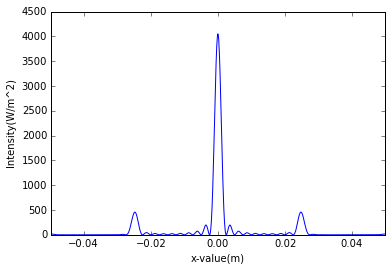

In [4]:
import cmath
import integrate
from matplotlib.pylab import plt
% matplotlib inline

w = 2e-4

def q(u):
    d = 2e-5
    alpha = math.pi/d
    return math.sin(alpha*u)**2

def integrand(func,u,x):
    f = 1
    lam = 5e-7
    o = func(u)
    return math.sqrt(o)*cmath.exp(1j*2*math.pi*x*u/(lam*f))

x_value = np.linspace(-0.05,0.05,1000)
I_value = []
for i in x_value:
    N = 100
    a = -w/2
    b = w/2
    h = ((b-a)/N)

    s =(integrand(q,a,i)/3) + (integrand(q,b,i)/3)
    for k in range(1,100):
        if(k % 2 == 1):
            s += 4/3*integrand(q,a+(k)*h,i)
        else:
            s += 2/3*integrand(q,a+(k)*h,i)
    I_value.append(abs(s)**2)
    
plt.plot(x_value,I_value)
plt.xlim(-0.05,0.05)
plt.xlabel("x-value(m)")
plt.ylabel("Intensity(W/m^2)")

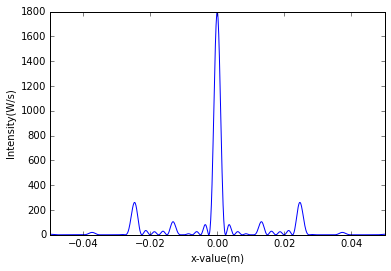

In [6]:
def q_new(u):
    d = 2e-5
    alpha = math.pi/(d)
    beta = alpha/2
    return math.sin(alpha*u)**2*math.sin(beta*u)**2

x2_value = np.linspace(-0.05,0.05,1000)
I2_value = []

for i in x2_value:
    N = 100
    a = -w/2
    b = w/2
    h = ((b-a)/N)

    s2 =(integrand(q_new,a,i)/3) + (integrand(q_new,b,i)/3)
    for k in range(1,100):
        if(k % 2 == 1):
            s2 += 4/3*integrand(q_new,a+(k)*h,i)
        else:
            s2 += 2/3*integrand(q_new,a+(k)*h,i)
    I2_value.append(abs(s2)**2)
    
plt.plot(x2_value,I2_value)
plt.xlim(-0.05,0.05)
plt.xlabel("x-value(m)")
plt.ylabel("Intensity(W/s)")
